In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_df = pd.read_csv('nsl-kdd/KDDTrain+.txt')
test_df = pd.read_csv('nsl-kdd/KDDTest+.txt')

train_df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [2]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

test_df.columns = columns
train_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [3]:
train_df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.109777,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.045241,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.051865,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.624363,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.010322,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101


In [4]:
# na prikazu korelacije nema ciljne varijable 'attack'
train_attack = train_df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

train_df['attack_flag'] = train_attack
test_df['attack_flag'] = test_attack

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [5]:
train_df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310,0.048785
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,0.005921
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,0.004118
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,0.007191
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130,0.095905
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,-0.002787
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013,-0.013084
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,-0.003755
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820,-0.690181
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,-0.010198


In [6]:
#izbacivanje stupaca sa slabom korelacijom
train_df.drop(columns=['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], axis=1, inplace=True)
train_df.drop(columns=['urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell'], axis=1, inplace=True)
train_df.drop(columns=['su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'rerror_rate', 'srv_rerror_rate'], axis=1, inplace=True)
train_df.drop(columns=['num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'srv_count', 'srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'attack', 'level', 'diff_srv_rate', 'dst_host_diff_srv_rate'], axis=1, inplace=True)
train_df.corr()

test_df.drop(columns=['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], axis=1, inplace=True)
test_df.drop(columns=['urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell'], axis=1, inplace=True)
test_df.drop(columns=['su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'rerror_rate', 'srv_rerror_rate'], axis=1, inplace=True)
test_df.drop(columns=['num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'srv_count', 'srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'attack', 'level', 'diff_srv_rate', 'dst_host_diff_srv_rate'], axis=1, inplace=True)

In [7]:
train_df.corr()

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_flag
logged_in,1.000000,-0.539761,-0.491931,-0.490173,0.600544,-0.401087,0.624363,0.604056,-0.491484,-0.493270,-0.690181
count,-0.539761,1.000000,0.457554,0.452090,-0.628022,0.468091,-0.395978,-0.473964,0.459045,0.460807,0.576442
serror_rate,-0.491931,0.457554,1.000000,0.993289,-0.761887,0.395582,-0.557810,-0.622804,0.979373,0.981139,0.650651
srv_serror_rate,-0.490173,0.452090,0.993289,1.000000,-0.756783,0.393353,-0.555038,-0.619136,0.977596,0.986252,0.648287
same_srv_rate,0.600544,-0.628022,-0.761887,-0.756783,1.000000,-0.509780,0.705418,0.788987,-0.760647,-0.765321,-0.751912
dst_host_count,-0.401087,0.468091,0.395582,0.393353,-0.509780,1.000000,-0.303210,-0.518148,0.410921,0.407531,0.375051
dst_host_srv_count,0.624363,-0.395978,-0.557810,-0.555038,0.705418,-0.303210,1.000000,0.896663,-0.572602,-0.567600,-0.722546
dst_host_same_srv_rate,0.604056,-0.473964,-0.622804,-0.619136,0.788987,-0.518148,0.896663,1.000000,-0.639211,-0.632054,-0.693813
dst_host_serror_rate,-0.491484,0.459045,0.979373,0.977596,-0.760647,0.410921,-0.572602,-0.639211,1.000000,0.985052,0.651840
dst_host_srv_serror_rate,-0.493270,0.460807,0.981139,0.986252,-0.765321,0.407531,-0.567600,-0.632054,0.985052,1.000000,0.654984


In [8]:
#testiranje korelacije string kategorija
categories = ['protocol_type', 'service', 'flag']

df_categories_train = train_df[categories]
df_categories_test = test_df[categories]

df_categories_enc_train=df_categories_train.apply(LabelEncoder().fit_transform)
df_categories_enc_test=df_categories_test.apply(LabelEncoder().fit_transform)

for cat in categories:
    train_df.drop(cat, axis=1, inplace=True)
    test_df.drop(cat, axis=1, inplace=True)
train_df=train_df.join(df_categories_enc_train)
test_df=test_df.join(df_categories_enc_test)
train_df.corr()

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_flag,protocol_type,service,flag
logged_in,1.000000,-0.539761,-0.491931,-0.490173,0.600544,-0.401087,0.624363,0.604056,-0.491484,-0.493270,-0.690181,-0.100921,-0.139432,0.589371
count,-0.539761,1.000000,0.457554,0.452090,-0.628022,0.468091,-0.395978,-0.473964,0.459045,0.460807,0.576442,-0.057613,0.099257,-0.470718
serror_rate,-0.491931,0.457554,1.000000,0.993289,-0.761887,0.395582,-0.557810,-0.622804,0.979373,0.981139,0.650651,-0.076610,0.276230,-0.451582
srv_serror_rate,-0.490173,0.452090,0.993289,1.000000,-0.756783,0.393353,-0.555038,-0.619136,0.977596,0.986252,0.648287,-0.078806,0.273344,-0.446913
same_srv_rate,0.600544,-0.628022,-0.761887,-0.756783,1.000000,-0.509780,0.705418,0.788987,-0.760647,-0.765321,-0.751912,0.045952,-0.369533,0.717126
dst_host_count,-0.401087,0.468091,0.395582,0.393353,-0.509780,1.000000,-0.303210,-0.518148,0.410921,0.407531,0.375051,0.236140,0.192855,-0.316751
dst_host_srv_count,0.624363,-0.395978,-0.557810,-0.555038,0.705418,-0.303210,1.000000,0.896663,-0.572602,-0.567600,-0.722546,0.103918,-0.407702,0.582695
dst_host_same_srv_rate,0.604056,-0.473964,-0.622804,-0.619136,0.788987,-0.518148,0.896663,1.000000,-0.639211,-0.632054,-0.693813,0.001701,-0.452702,0.630126
dst_host_serror_rate,-0.491484,0.459045,0.979373,0.977596,-0.760647,0.410921,-0.572602,-0.639211,1.000000,0.985052,0.651840,-0.079399,0.281632,-0.443438
dst_host_srv_serror_rate,-0.493270,0.460807,0.981139,0.986252,-0.765321,0.407531,-0.567600,-0.632054,0.985052,1.000000,0.654984,-0.077926,0.277592,-0.443223


In [9]:
train_df

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_flag,protocol_type,service,flag
0,0,13,0.0,0.0,0.08,255,1,0.00,0.00,0.00,0,2,44,9
1,0,123,1.0,1.0,0.05,255,26,0.10,1.00,1.00,1,1,49,5
2,1,5,0.2,0.2,1.00,30,255,1.00,0.03,0.01,0,1,24,9
3,1,30,0.0,0.0,1.00,255,255,1.00,0.00,0.00,0,1,24,9
4,0,121,0.0,0.0,0.16,255,19,0.07,0.00,0.00,1,1,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,184,1.0,1.0,0.14,255,25,0.10,1.00,1.00,1,1,49,5
125968,0,2,0.0,0.0,1.00,255,244,0.96,0.00,0.00,0,2,49,9
125969,1,1,0.0,0.0,1.00,255,30,0.12,0.72,0.00,0,1,54,9
125970,0,144,1.0,1.0,0.06,255,8,0.03,1.00,1.00,1,1,30,5


In [10]:
#buduci da su trening i test podaci vec bili podijeljeni u dvije tekstualne datoteke
#nema potrebe da se koristi train_test_split

y_train = train_df['attack_flag'].values
y_test = test_df['attack_flag'].values
X_train = train_df.drop(['attack_flag'], axis=1)
X_test = test_df.drop(['attack_flag'], axis=1)

In [14]:
k=int(math.sqrt(len(train_df)))
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
clf_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))

0.6984873353147318


<AxesSubplot:>

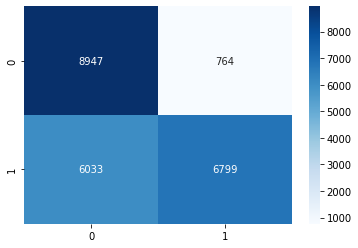

In [12]:
conf_matrix=confusion_matrix(y_test, clf_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d")

In [13]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.60      0.92      0.72      9711
           1       0.90      0.53      0.67     12832

    accuracy                           0.70     22543
   macro avg       0.75      0.73      0.70     22543
weighted avg       0.77      0.70      0.69     22543

